In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
telco_data  = pd.read_csv('telco_customer.csv')

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
telco_data[telco_data.isnull()==True].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ok, So our data has no **Null Values** embeded, we can go into plotting the data visually.

Our target is to check if the customer left the company or not. So let's alalyze the **'Churn'** column

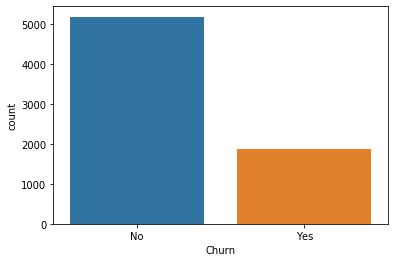

In [7]:
sns.countplot(telco_data['Churn'])

In [8]:
(telco_data.groupby('Churn').count()/7043)*100

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013
Yes,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987


This means our target for the customer survival analysis "Left the company" in some time duration T is satisfied for **73.46%** and not satisfied for **26.53%**.

This also means we have around **74%** of right censored data for the given T (tenure)

In [9]:
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce')
telco_data['Churn']=telco_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [10]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

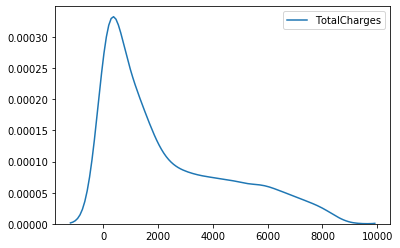

In [20]:
sns.kdeplot(data= telco_data['TotalCharges'])

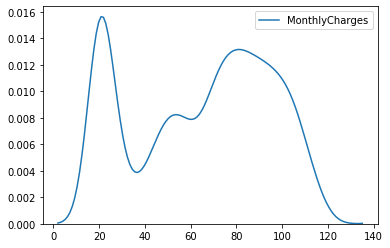

In [12]:
sns.kdeplot(data= telco_data['MonthlyCharges'])

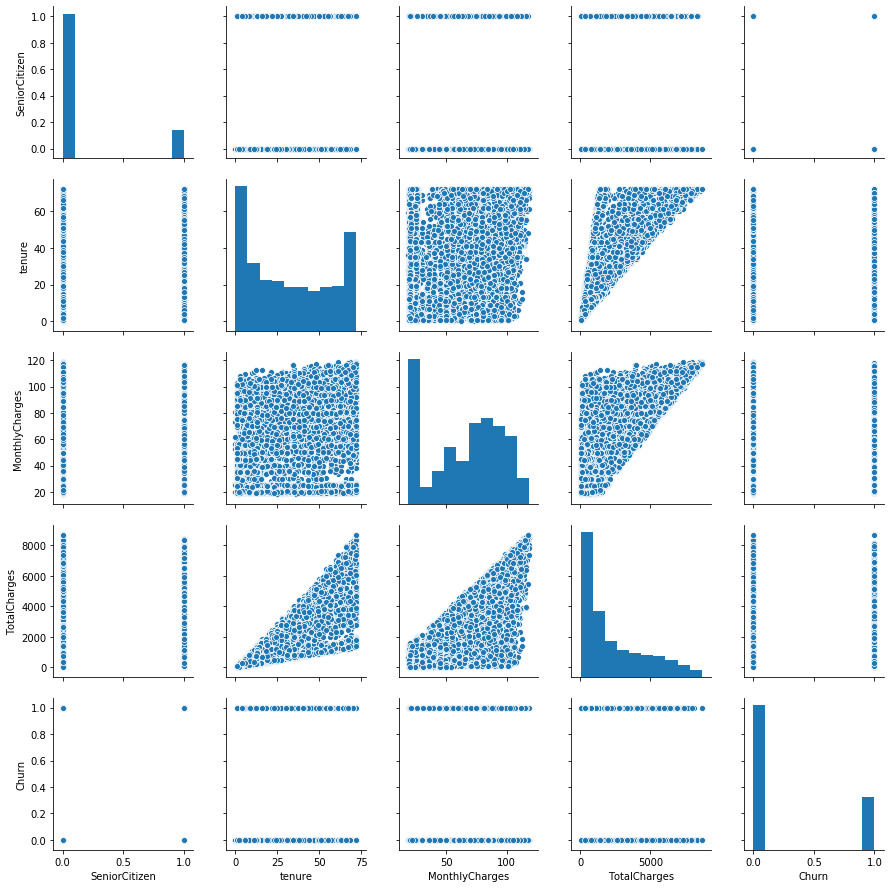

In [22]:
sns.pairplot(telco_data)

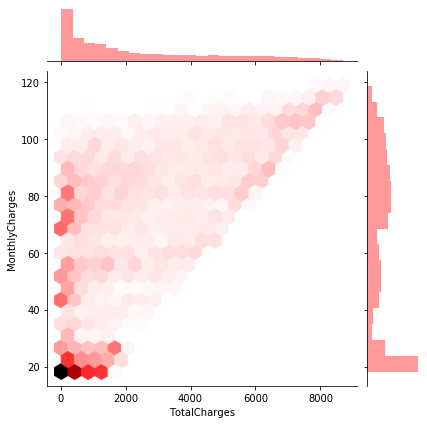

In [14]:
sns.jointplot(x='TotalCharges',y='MonthlyCharges',data=telco_data,kind='hex',color='red')

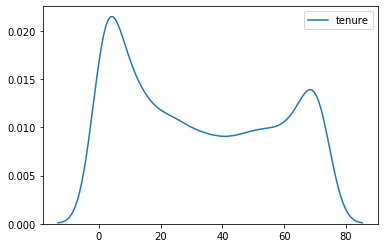

In [15]:
sns.kdeplot(data= telco_data['tenure'])

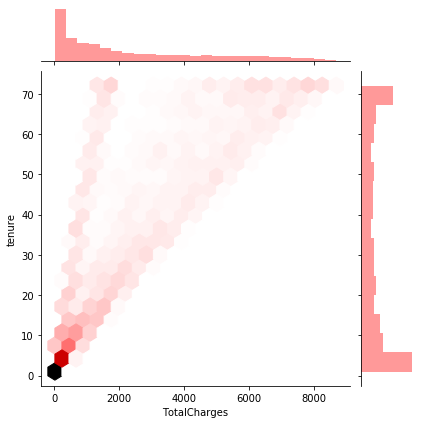

In [16]:
sns.jointplot(x='TotalCharges',y='tenure',data=telco_data,kind='hex',color='red')

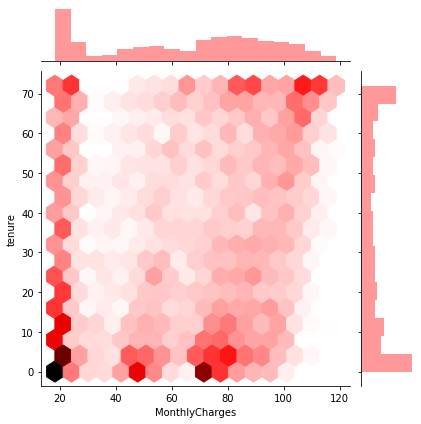

In [17]:
sns.jointplot(x='MonthlyCharges',y='tenure',data=telco_data,kind='hex',color='red')

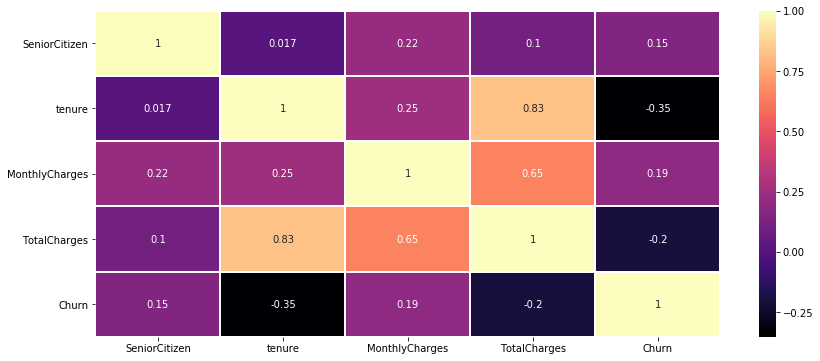

In [34]:
plt.figure(figsize = (14,6))
sns.heatmap(telco_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)
